In [1]:
library(tseries)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
train = read.csv('/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Train.csv')
test = read.csv('/kaggle/input/grocery-sales-forecast-weekend-hackathon/Grocery_Sales_ParticipantsData/Test.csv')

In [3]:
data = ts(train$GrocerySales, start=c(1,1), end=c(1, nrow(train)), frequency = 30)

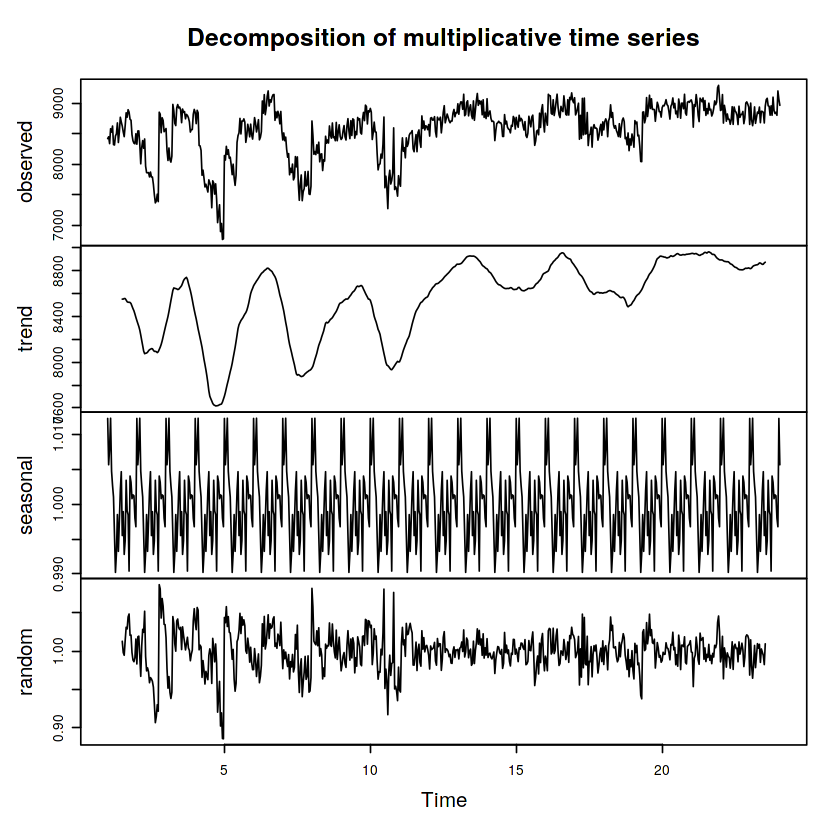

In [4]:
data.decompose = decompose(data, type = 'multi')
plot(data.decompose)

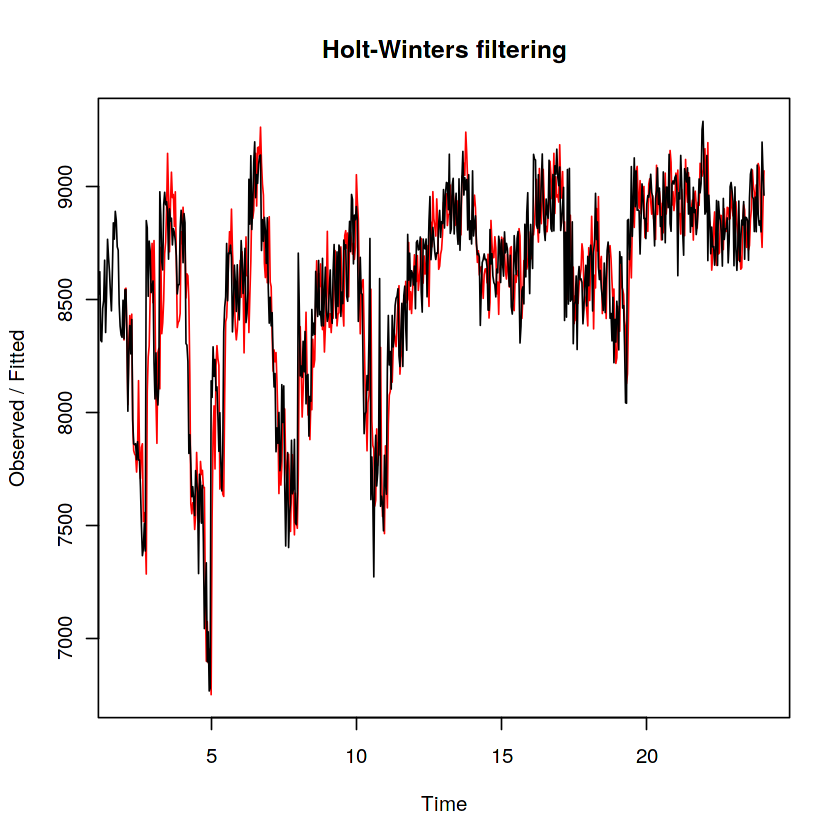

In [5]:
hws = HoltWinters(data, l.start = head(data, 1))
plot(hws)

In [6]:
test_pred = predict(hws, n.ahead = nrow(test))

In [7]:
submission = data.frame("Day"=test$Day, "GrocerySales"=test_pred)
names(submission)[2] = "GrocerySales"
write.csv(submission, "submission.csv", row.names = F)